# Part I

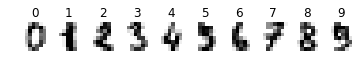

In [190]:
# Import datasets

%matplotlib inline

from sklearn import datasets
import matplotlib.pyplot as plt
digits = datasets.load_digits()
for index, (image, label) in enumerate(list(zip(digits.images, digits.target))[:10]):
    plt.subplot(1, 10, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r)
    plt.title('%i' % label)
plt.show()

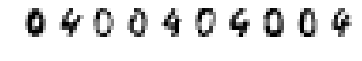

In [191]:
from sklearn.model_selection import train_test_split
import numpy as np
from numpy.linalg import norm


number_a = 0 # TODO choose your digit
number_b = 4 # TODO choose your digit

digit_a_indexes = np.where(digits.target==number_a)   #return elements where the target is a or b
digit_b_indexes = np.where(digits.target==number_b)
targets = np.concatenate((digits.target[digit_a_indexes], digits.target[digit_b_indexes]))
images = np.concatenate((digits.images[digit_a_indexes], digits.images[digit_b_indexes]))
#images are train features; while targets are labels; test_size of the portion of images used as test set
X_train, X_test, y_train, y_test = train_test_split(images, targets, test_size=0.1, random_state=42)
for index, image in enumerate(X_train[:10]):
    plt.subplot(1, 10, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r)
plt.show()

# Feature Extraction

In [192]:
def compute_features(vector):
    image = vector.reshape(8, 8) # get back original image shape
    def compute_feature_a(image):  # first feature is to count the non-zero pixels numbers
        '''compute_feature_a will compute ...'''
        flat_img=image.reshape(-1)
        int_img=sum(abs(flat_img))/500
        return int_img

    def compute_feature_b(image):  #second feature is its symmetry
        '''compute_feature_b will compute ...'''
        image_flip=np.flip(image,0)
        sym_img=sum(sum(abs(image_flip-image)))/350
        
        #sym_img0 = np.sum(np.sum(image[:,3:4]))  # Calculate total intensity of the middle two columns
        #sym_img=sym_img0/120

        return sym_img
    
    return compute_feature_a(image), compute_feature_b(image)

(0.08571428571428572, 0.92)

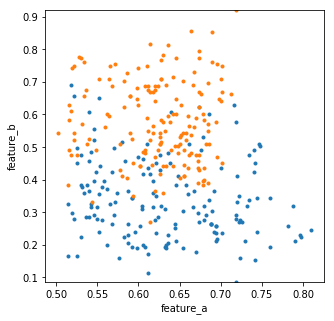

In [193]:
# Apply and plot your features

X_features = np.apply_along_axis(compute_features, 1,
                                 X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2]))

X_features_a = X_features[np.where(y_train==number_a)]  #number is 0
X_features_b = X_features[np.where(y_train==number_b)]  #number is 4

plt.figure(figsize=(5,5))
plt.plot(X_features_a[:, 0], X_features_a[:, 1], '.')
plt.plot(X_features_b[:, 0], X_features_b[:, 1], '.')
plt.xlabel('feature_a')
plt.ylabel('feature_b')
plt.ylim(X_features[:, 1].min(), X_features[:, 1].max())

# Linear Classification with Pseudo Inverse

# explain: see the photo

In [194]:
pseudo_y = np.copy(y_train)
pseudo_y[y_train == number_a] = -1
pseudo_y[y_train == number_b] = 1

# Calculate x below
X_features_inverse = np.linalg.pinv(X_features)  #create a features vector X and compute its pseudo inverse.
# print(X_features_inverse)
w=np.matmul(X_features_inverse,pseudo_y)
print(w)

[-2.61863338  3.63571262]


In [195]:
# (d) examine the accuracy

def accuracy_metrics2(features, label,weight,t=0):
    # features should be your X_features
    # label should be the y^{i} label
    y_predicted=np.matmul(features,weight)
    y_predicted[y_predicted<t] = -1
    y_predicted[y_predicted>t] = 1
    distance=y_predicted-label
    non0num=np.count_nonzero(distance) #use norm 2
    error=(len(label)-non0num)/len(label)*100
    return error # Return the % accuracy

error_train=accuracy_metrics2(X_features,pseudo_y,w,0)
y_predicted=np.matmul(X_features,w)
print("training accuracy: %f percent" % (error_train))
#print(pseudo_y)
#print(y_predicted)
#print("test error: %f" % (error_test_int))

X_features_test = np.apply_along_axis(compute_features, 1,
                                 X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2]))
X_features_a_test = X_features_test[np.where(y_test==number_a)]  #number is 0
X_features_b_test = X_features_test[np.where(y_test==number_b)]  #number is 4

pseudo_y_test = np.copy(y_test)
pseudo_y_test[y_test == number_a] = -1
pseudo_y_test[y_test == number_b] = 1
error_test=accuracy_metrics2(X_features_test,pseudo_y_test,w,0)
print("test accuracy: %f percent" % (error_test))

training accuracy: 80.495356 percent
test accuracy: 77.777778 percent


In [196]:
# (e) visualizes the decision boundary
def visualize_model(X_features_a,X_features_b,labels,weights):
    plt.figure(figsize=(5,5))
    plt.plot(X_features_a[:, 0], X_features_a[:, 1], '.')
    plt.plot(X_features_b[:, 0], X_features_b[:, 1], '.')
    plt.xlabel('feature_a')
    plt.ylabel('feature_b')
    plt.ylim(X_features[:, 1].min(), X_features[:, 1].max())
    x1points=np.linspace(0.5,0.8,100)
    coeff=-weights[0]/weights[1]
    linex2=coeff*x1points
    plt.plot(x1points,linex2)
    return None

Text(0.5, 1.0, 'Test data')

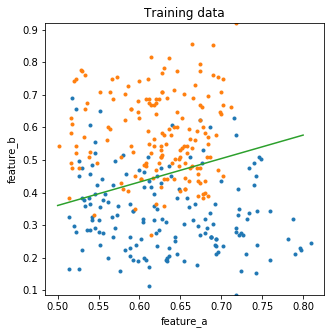

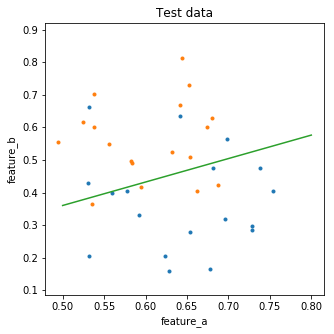

In [197]:
visualize_model(X_features_a,X_features_b, pseudo_y, w)
plt.title('Training data')
visualize_model(X_features_a_test,X_features_b_test,pseudo_y_test, w)
plt.title('Test data')

Biased weight: -1.950177 0.163743
Training accuracy with bias: 81.733746 percent
Test accuracy with bias: 75.000000 percent
conclusion: after bias is added, no obvious increase in accuracy observed


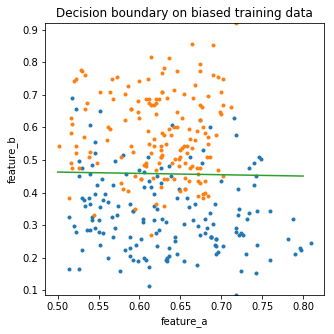

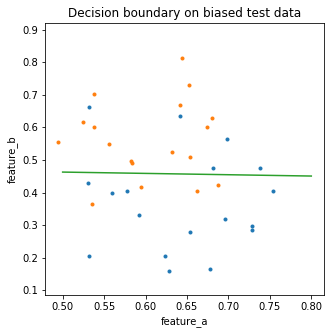

In [198]:
# Pseudo inverse method after adding bias
datasize=np.shape(X_features)
row=datasize[0]
bias=np.ones((row,1))
# add bias to the feature matrix
X_features_biased=np.hstack((bias,X_features)) 
# recalculate w
X_features_inverse_biased = np.linalg.pinv(X_features_biased)  #create a features vector X and compute its pseudo inverse.
# print(X_features_inverse)
w_biased=np.matmul(X_features_inverse_biased,pseudo_y)
print("Biased weight: %f %f" % (w_biased[0],w_biased[1]))

# Get the test and train accuracy of your model with bias
# train data accuray
error_train_biased=accuracy_metrics2(X_features_biased,pseudo_y,w_biased)
print("Training accuracy with bias: %f percent" % (error_train_biased))


# test data accuray
datasize_test=np.shape(X_features_test)
row_test=datasize_test[0]
bias_test=np.ones((row_test,1))
X_features_test_biased=np.hstack((bias_test,X_features_test)) 
error_test_biased=accuracy_metrics2(X_features_test_biased,pseudo_y_test,w_biased)
print("Test accuracy with bias: %f percent" % (error_test_biased))

#visulize the model
def visualize_model_biased(X_features_a,X_features_b,labels,weights):
    plt.figure(figsize=(5,5))
    plt.plot(X_features_a[:, 0], X_features_a[:, 1], '.')
    plt.plot(X_features_b[:, 0], X_features_b[:, 1], '.')
    plt.xlabel('feature_a')
    plt.ylabel('feature_b')
    plt.ylim(X_features[:, 1].min(), X_features[:, 1].max())
    x1points=np.linspace(0.5,0.8,100)
    coeff1=-weights[0]/weights[2]
    coeff2=-weights[1]/weights[2]
    linex2=coeff1+coeff2*x1points
    plt.plot(x1points,linex2)
    return None
visualize_model_biased(X_features_a,X_features_b, pseudo_y, w_biased)
plt.title('Decision boundary on biased training data')
visualize_model_biased(X_features_a_test,X_features_b_test, pseudo_y_test, w_biased)
plt.title('Decision boundary on biased test data')
print('conclusion: after bias is added, no obvious increase in accuracy observed')

# Linear Classification with Finite Differences

Iteration 0 | Cost: 0.501361
Iteration 1 | Cost: 0.464780
Iteration 2 | Cost: 0.446179
Iteration 3 | Cost: 0.435981
Iteration 4 | Cost: 0.429682
Iteration 5 | Cost: 0.425178
Iteration 6 | Cost: 0.421494
Iteration 7 | Cost: 0.418189
Iteration 8 | Cost: 0.415067
Iteration 9 | Cost: 0.412042
Iteration 10 | Cost: 0.409083
Iteration 11 | Cost: 0.406178
Iteration 12 | Cost: 0.403324
Iteration 13 | Cost: 0.400521
Iteration 14 | Cost: 0.397771
Iteration 15 | Cost: 0.395075
Iteration 16 | Cost: 0.392434
Iteration 17 | Cost: 0.389847
Iteration 18 | Cost: 0.387316
Iteration 19 | Cost: 0.384838
Iteration 20 | Cost: 0.382414
Iteration 21 | Cost: 0.380042
Iteration 22 | Cost: 0.377723
Iteration 23 | Cost: 0.375454
Iteration 24 | Cost: 0.373235
Iteration 25 | Cost: 0.371065
Iteration 26 | Cost: 0.368943
Iteration 27 | Cost: 0.366867
Iteration 28 | Cost: 0.364838
Iteration 29 | Cost: 0.362853
Iteration 30 | Cost: 0.360913
Iteration 31 | Cost: 0.359015
Iteration 32 | Cost: 0.357159
Iteration 33 | Cost:

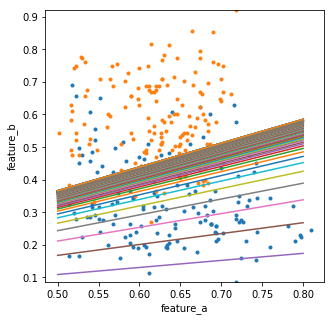

In [200]:
# Linear Classification with Finite Differences
from sklearn.metrics import mean_squared_error
def loss(features, labels, weights):
    features_Trans=features.transpose()
    datasize=np.shape(features)
    instance_num=datasize[0]
    y_pred = np.dot(features,weights)
    loss = y_pred - labels
    cost = np.sum(loss**2) / (2*instance_num)   # half MSE of the predict and the labels
    return cost


w_gradient = np.random.rand(2) # init weights to some random value.
num_iterations = 200 # set this to the number of iterations
delta = 10e-2 # This may need to be adjusted
step_size = 50e-2
gradient = np.zeros((2,))

plt.figure(figsize=(5,5))
plt.plot(X_features_a[:, 0], X_features_a[:, 1], '.')
plt.plot(X_features_b[:, 0], X_features_b[:, 1], '.')
plt.xlabel('feature_a')
plt.ylabel('feature_b')
plt.ylim(X_features[:, 1].min(), X_features[:, 1].max())
x1points=np.linspace(0.5,0.8,100)


for i in range(num_iterations):
    cost=loss(X_features,pseudo_y,w_gradient)
    w1 = np.copy(w_gradient)
    w1[0] = w1[0]+delta
    gradient[0] = (loss(X_features, pseudo_y, w1)-loss(X_features, pseudo_y, w_gradient))/delta
    
    w2 = np.copy(w_gradient)
    w2[1] = w2[1]+delta
    gradient[1] = (loss(X_features, pseudo_y, w2)-loss(X_features, pseudo_y, w_gradient))/delta
    
    coeff=-w_gradient[0]/w_gradient[1]
    linex2=coeff*x1points
    plt.plot(x1points,linex2)
    w_gradient=w_gradient-step_size * gradient
    print("Iteration %d | Cost: %f" % (i, cost))
 #   visualize_model_gradient(X_features_a,X_features_b,pseudo_y, w)
error_gradient=accuracy_metrics2(X_features,pseudo_y,w_gradient)

print("Gradient descent weight: %f %f" % (w_gradient[0],w_gradient[1]))
print("cost: %f" % (cost))
print("Accuracy from gradient descent: %f percent" % (error_gradient))


# Logistic Classification with Finite Differences

Iteration 0 | Cost: 0.303164
Iteration 1 | Cost: 0.295801
Iteration 2 | Cost: 0.288438
Iteration 3 | Cost: 0.281075
Iteration 4 | Cost: 0.273712
Iteration 5 | Cost: 0.266349
Iteration 6 | Cost: 0.258986
Iteration 7 | Cost: 0.251623
Iteration 8 | Cost: 0.244260
Iteration 9 | Cost: 0.236896
Iteration 10 | Cost: 0.229533
Iteration 11 | Cost: 0.222170
Iteration 12 | Cost: 0.214807
Iteration 13 | Cost: 0.207444
Iteration 14 | Cost: 0.200081
Iteration 15 | Cost: 0.192718
Iteration 16 | Cost: 0.185355
Iteration 17 | Cost: 0.177992
Iteration 18 | Cost: 0.170629
Iteration 19 | Cost: 0.163266
Iteration 20 | Cost: 0.155903
Iteration 21 | Cost: 0.148540
Iteration 22 | Cost: 0.141176
Iteration 23 | Cost: 0.133813
Iteration 24 | Cost: 0.126450
Iteration 25 | Cost: 0.119087
Iteration 26 | Cost: 0.111724
Iteration 27 | Cost: 0.104361
Iteration 28 | Cost: 0.096998
Iteration 29 | Cost: 0.089635
Iteration 30 | Cost: 0.082272
Iteration 31 | Cost: 0.074909
Iteration 32 | Cost: 0.067551
Iteration 33 | Cost:

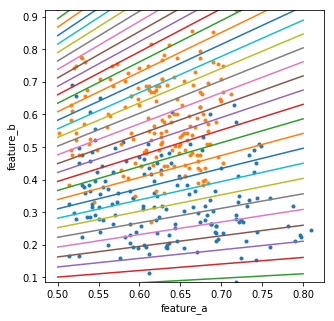

In [176]:
# Logistic Classification with Finite Differences
logistic_y = np.copy(y_train)
logistic_y[y_train == number_a] = 0  #reset the labels to 0 to 1
logistic_y[y_train == number_b] = 1

#def sigmoid_activation(scores):
 #   sig_result=1 / (1 + np.exp(-scores))
 #   sig_result=1 + np.exp(-scores)
  #  return sig_result

def loss_logistic(features, labels, weights):
   
    datasize=np.shape(features)
    instance_num=datasize[0]
    y_pred = np.dot(features,weights)
    loss = y_pred - labels
    cost_log = (1/instance_num)*(np.sum(np.log(1+np.exp(np.dot(-labels,y_pred)))))  
   # gradient = np.dot(features_Trans, loss)/instance_num  #derivative of MSE
    return cost_log

def accuracy_metrics3(features, label,weight,t=0.5):
    # features should be your X_features
    # label should be the y^{i} label
    y_predicted=np.matmul(features,weight)
    y_predicted[y_predicted<t] = 0
    y_predicted[y_predicted>t] = 1
    distance=y_predicted-label
    non0num=np.count_nonzero(distance) #use norm 2
    error=(len(label)-non0num)/len(label)*100
    return error # Return the % accuracy
    

#w_gradient_log = np.random.rand(2) # init weights to some random value.
w_gradient_log = np.ones((2))*-0.5
num_iterations = 200 # set this to the number of iterations
delta = 20e-2 # This may need to be adjusted 10e-3
step_size = 40e-3 #20e-3
gradient = np.zeros((2,))

plt.figure(figsize=(5,5))
plt.plot(X_features_a[:, 0], X_features_a[:, 1], '.')
plt.plot(X_features_b[:, 0], X_features_b[:, 1], '.')
plt.xlabel('feature_a')
plt.ylabel('feature_b')
plt.ylim(X_features[:, 1].min(), X_features[:, 1].max())
x1points=np.linspace(0.5,0.8,100)

for i in range(num_iterations):
    cost_log=loss_logistic(X_features,logistic_y,w_gradient_log)
    w1 = np.copy(w_gradient_log)
    w1[0] = w1[0]+delta
    gradient[0] = (loss_logistic(X_features, logistic_y, w1)-loss_logistic(X_features, logistic_y, w_gradient_log))/delta
    
    w2 = np.copy(w_gradient_log)
    w2[1] = w2[1]+delta
    gradient[1] = (loss_logistic(X_features, logistic_y, w2)-loss_logistic(X_features, logistic_y, w_gradient_log))/delta
    
    coeff=-w_gradient_log[0]/w_gradient_log[1]
    linex2=coeff*x1points
    plt.plot(x1points,linex2)
    w_gradient_log=w_gradient_log-step_size * (gradient)
    print("Iteration %d | Cost: %f" % (i, cost_log))
    
error_gradient_log=accuracy_metrics3(X_features,logistic_y,w_gradient_log,t=0.5)
print("Gradient descent weight: %f %f" % (w_gradient_log[0],w_gradient_log[1]))
print("cost: %f" % (cost_log))
print("Accuracy from gradient descent: %f percent" % (error_gradient_log))

# Part II

[-3.33241703  2.89306819]
training accuracy using Pseudo method: 91.640867 percent
test accuracy using Pseudo method: 91.666667 percent


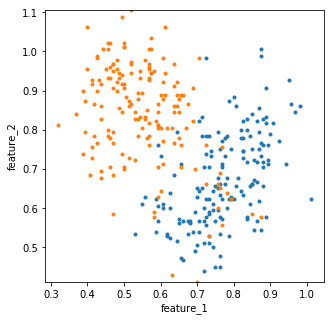

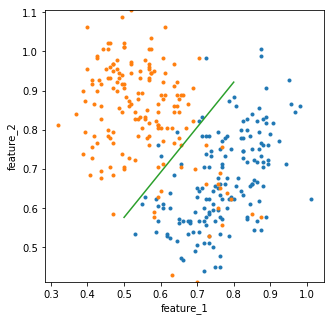

In [173]:
# define two features
def compute_features_int(vector):
    image = vector.reshape(8, 8) # get back original image shape
    def compute_feature_1(image):  # first feature is to count the non-zero pixels numbers
        '''compute_feature_1 will compute ...'''
        first_half=image[0:3,:]
        flat_img=first_half.reshape(-1)/160
        int_img_half1=sum(abs(flat_img))
        return int_img_half1

    def compute_feature_2(image):  #second feature is its symmetry
        '''compute_feature_2 will compute ...'''
        first_half=image[4:7,:]
        flat_img=first_half.reshape(-1)
        int_img_half2=sum(abs(flat_img))/180
        return int_img_half2
    
    return compute_feature_1(image), compute_feature_2(image)

# draw the dots of the two features

X_features_int = np.apply_along_axis(compute_features_int, 1,
                                 X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2]))

X_features_1 = X_features_int[np.where(y_train==number_a)]  #number is 0
X_features_2 = X_features_int[np.where(y_train==number_b)]  #number is 4

plt.figure(figsize=(5,5))
plt.plot(X_features_1[:, 0], X_features_1[:, 1], '.')
plt.plot(X_features_2[:, 0], X_features_2[:, 1], '.')
plt.xlabel('feature_1')
plt.ylabel('feature_2')
plt.ylim(X_features_int[:, 1].min(), X_features_int[:, 1].max())

# Use gradiebt descent to find the model
#w_gradient_int = np.random.rand(2) # init weights to some random value.
w_gradient_log = np.ones((2))*-0.5
num_iterations = 200 # set this to the number of iterations
delta = 10e-3 # This may need to be adjusted 10e-3
step_size = 10e-1 #10e-3
gradient = np.zeros((2,))

plt.figure(figsize=(5,5))
plt.plot(X_features_1[:, 0], X_features_1[:, 1], '.')
plt.plot(X_features_2[:, 0], X_features_2[:, 1], '.')
plt.xlabel('feature_1')
plt.ylabel('feature_2')
plt.ylim(X_features_int[:, 1].min(), X_features_int[:, 1].max())
x1points_int=np.linspace(0.3,1.0,100)
    
# Calculate x below
X_features_inverse_int = np.linalg.pinv(X_features_int)  #create a features vector X and compute its pseudo inverse.
# print(X_features_inverse)
w_int=np.matmul(X_features_inverse_int,pseudo_y)
print(w_int)
coeff=-w_int[0]/w_int[1]
linex2=coeff*x1points
plt.plot(x1points,linex2)
# estimate the accuracy
X_features_test_int = np.apply_along_axis(compute_features_int, 1,
                                 X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2]))
X_features_1_test= X_features_test[np.where(y_test==number_a)]  #number is 0
X_features_2_test = X_features_test[np.where(y_test==number_b)]  #number is 4

error_train_int=accuracy_metrics2(X_features_int,pseudo_y,w_int)
error_test_int=accuracy_metrics2(X_features_test_int,pseudo_y_test,w_int)
#print("Iteration %d | Cost: %f" % (i, cost))
print("training accuracy using Pseudo method: %f percent" % (error_train_int))
print("test accuracy using Pseudo method: %f percent" % (error_test_int))

Iteration 0 | Cost: 0.351358
Iteration 1 | Cost: 0.348523
Iteration 2 | Cost: 0.345689
Iteration 3 | Cost: 0.342855
Iteration 4 | Cost: 0.340020
Iteration 5 | Cost: 0.337186
Iteration 6 | Cost: 0.334352
Iteration 7 | Cost: 0.331517
Iteration 8 | Cost: 0.328683
Iteration 9 | Cost: 0.325849
Iteration 10 | Cost: 0.323014
Iteration 11 | Cost: 0.320180
Iteration 12 | Cost: 0.317346
Iteration 13 | Cost: 0.314511
Iteration 14 | Cost: 0.311677
Iteration 15 | Cost: 0.308843
Iteration 16 | Cost: 0.306008
Iteration 17 | Cost: 0.303174
Iteration 18 | Cost: 0.300340
Iteration 19 | Cost: 0.297505
Iteration 20 | Cost: 0.294671
Iteration 21 | Cost: 0.291837
Iteration 22 | Cost: 0.289002
Iteration 23 | Cost: 0.286168
Iteration 24 | Cost: 0.283334
Iteration 25 | Cost: 0.280499
Iteration 26 | Cost: 0.277665
Iteration 27 | Cost: 0.274830
Iteration 28 | Cost: 0.271996
Iteration 29 | Cost: 0.269162
Iteration 30 | Cost: 0.266327
Iteration 31 | Cost: 0.263493
Iteration 32 | Cost: 0.260659
Iteration 33 | Cost:

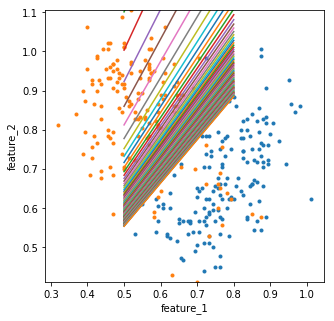

In [177]:

#w_gradient_log = np.random.rand(2) # init weights to some random value.
w_gradient_log = np.ones((2))*-0.5
num_iterations = 200 # set this to the number of iterations
delta = 10e-3 # This may need to be adjusted 10e-3
step_size = 11e-3 #10e-3
gradient = np.zeros((2,))

plt.figure(figsize=(5,5))
plt.plot(X_features_1[:, 0], X_features_1[:, 1], '.')
plt.plot(X_features_2[:, 0], X_features_2[:, 1], '.')
plt.xlabel('feature_1')
plt.ylabel('feature_2')
plt.ylim(X_features_int[:, 1].min(), X_features_int[:, 1].max())
x1points_int=np.linspace(0.3,1.0,100)

for i in range(num_iterations):
    cost_log=loss_logistic(X_features_int,logistic_y,w_gradient_log)
    w1 = np.copy(w_gradient_log)
    w1[0] = w1[0]+delta
    gradient[0] = (loss_logistic(X_features_int, logistic_y, w1)-loss_logistic(X_features_int, logistic_y, w_gradient_log))/delta
    
    w2 = np.copy(w_gradient_log)
    w2[1] = w2[1]+delta
    gradient[1] = (loss_logistic(X_features_int, logistic_y, w2)-loss_logistic(X_features_int, logistic_y, w_gradient_log))/delta
    
    coeff=-w_gradient_log[0]/w_gradient_log[1]
    linex2=coeff*x1points
    plt.plot(x1points,linex2)
    w_gradient_log=w_gradient_log-step_size * gradient
    print("Iteration %d | Cost: %f" % (i, cost_log))
    
error_gradient_log=accuracy_metrics3(X_features_int,logistic_y,w_gradient_log,t=0.5)
print("Gradient descent weight: %f %f" % (w_gradient_log[0],w_gradient_log[1]))
print("cost: %f" % (cost_log))
print("Accuracy from gradient descent: %f percent" % (error_gradient_log))

# Part III

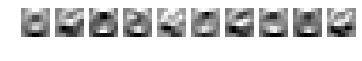

In [181]:
from sklearn.model_selection import train_test_split
import numpy as np

number_a = 0 # TODO choose your digit
number_b = 4 # TODO choose your digit

digit_a_indexes = np.where(digits.target==number_a)   #return elements where the target is a or b
digit_b_indexes = np.where(digits.target==number_b)
targets = np.concatenate((digits.target[digit_a_indexes], digits.target[digit_b_indexes]))
images = np.concatenate((digits.images[digit_a_indexes], digits.images[digit_b_indexes]))
kernel=[[-1,-1,-1], [0,0,0], [1,1,1]]
from scipy.signal import convolve2d
X_train, X_test, y_train, y_test = train_test_split(images, targets, test_size=0.1, random_state=42)

for i in range(X_train.shape[0]):
    X_train[i,:,:] = convolve2d(X_train[i,:,:], kernel, mode='same')

for i in range(X_test.shape[0]):
    X_test[i,:,:] = convolve2d(X_test[i,:,:], kernel, mode='same')

for index, image in enumerate(X_train[:10]):
    plt.subplot(1, 10, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r)     
plt.show()

(0.4811764705882353, 1.016470588235294)

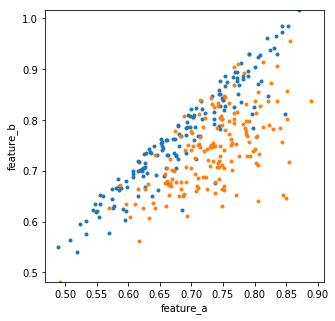

In [182]:
def compute_features(vector):
    image = vector.reshape(8, 8) # get back original image shape
    def compute_feature_a(image):  # first feature is to count the non-zero pixels numbers
        '''compute_feature_a will compute ...'''
        flat_img=image.reshape(-1)
        int_img=sum(abs(flat_img))/1000
        return int_img

    def compute_feature_b(image):  #second feature is its symmetry
        '''compute_feature_b will compute ...'''
        image_flip=np.flip(image,0)
        sym_img=sum(sum(abs(image_flip-image)))/1700

        return sym_img
    
    return compute_feature_a(image), compute_feature_b(image)

# Apply and plot your features

X_features = np.apply_along_axis(compute_features, 1,
                                 X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2]))

X_features_a = X_features[np.where(y_train==number_a)]  #number is 0
X_features_b = X_features[np.where(y_train==number_b)]  #number is 4

plt.figure(figsize=(5,5))
plt.plot(X_features_a[:, 0], X_features_a[:, 1], '.')
plt.plot(X_features_b[:, 0], X_features_b[:, 1], '.')
plt.xlabel('feature_a')
plt.ylabel('feature_b')
plt.ylim(X_features[:, 1].min(), X_features[:, 1].max())



[10.05733135 -9.46106108]
training error: 81.114551 percent
test error: 69.444444 percent


Text(0.5, 1.0, 'Test data')

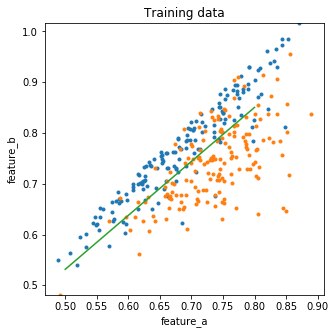

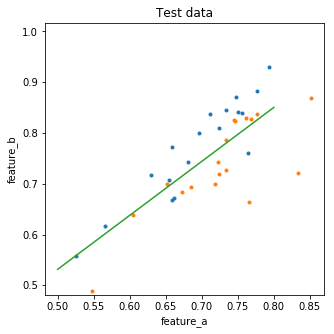

In [183]:
pseudo_y = np.copy(y_train)
pseudo_y[y_train == number_a] = -1
pseudo_y[y_train == number_b] = 1

# Calculate x below
X_features_inverse = np.linalg.pinv(X_features)  #create a features vector X and compute its pseudo inverse.
# print(X_features_inverse)
w=np.matmul(X_features_inverse,pseudo_y)
print(w)

def accuracy_metrics2(features, label,weight,t=0):
    # features should be your X_features
    # label should be the y^{i} label
    y_predicted=np.matmul(features,weight)
    y_predicted[y_predicted<t] = -1
    y_predicted[y_predicted>t] = 1
    distance=y_predicted-label
    non0num=np.count_nonzero(distance) #use norm 2
    error=(len(label)-non0num)/len(label)*100
    return error # Return the % accuracy

error_train=accuracy_metrics2(X_features,pseudo_y,w,0)
y_predicted=np.matmul(X_features,w)
print("training error: %f percent" % (error_train))
#print(pseudo_y)
#print(y_predicted)
#print("test error: %f" % (error_test_int))

X_features_test = np.apply_along_axis(compute_features, 1,
                                 X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2]))
X_features_a_test = X_features_test[np.where(y_test==number_a)]  #number is 0
X_features_b_test = X_features_test[np.where(y_test==number_b)]  #number is 4

pseudo_y_test = np.copy(y_test)
pseudo_y_test[y_test == number_a] = -1
pseudo_y_test[y_test == number_b] = 1
error_test=accuracy_metrics2(X_features_test,pseudo_y_test,w,0)
print("test error: %f percent" % (error_test))

# (e) visualizes the decision boundary
def visualize_model(X_features_a,X_features_b,labels,weights):
    plt.figure(figsize=(5,5))
    plt.plot(X_features_a[:, 0], X_features_a[:, 1], '.')
    plt.plot(X_features_b[:, 0], X_features_b[:, 1], '.')
    plt.xlabel('feature_a')
    plt.ylabel('feature_b')
    plt.ylim(X_features[:, 1].min(), X_features[:, 1].max())
    x1points=np.linspace(0.5,0.8,100)
    coeff=-weights[0]/weights[1]
    linex2=coeff*x1points
    plt.plot(x1points,linex2)
    return None

visualize_model(X_features_a,X_features_b, pseudo_y, w)
plt.title('Training data')
visualize_model(X_features_a_test,X_features_b_test,pseudo_y_test, w)
plt.title('Test data')

Iteration 0 | Cost: 0.372179
Iteration 1 | Cost: 0.369408
Iteration 2 | Cost: 0.366638
Iteration 3 | Cost: 0.363868
Iteration 4 | Cost: 0.361097
Iteration 5 | Cost: 0.358327
Iteration 6 | Cost: 0.355557
Iteration 7 | Cost: 0.352786
Iteration 8 | Cost: 0.350016
Iteration 9 | Cost: 0.347245
Iteration 10 | Cost: 0.344475
Iteration 11 | Cost: 0.341705
Iteration 12 | Cost: 0.338934
Iteration 13 | Cost: 0.336164
Iteration 14 | Cost: 0.333394
Iteration 15 | Cost: 0.330623
Iteration 16 | Cost: 0.327853
Iteration 17 | Cost: 0.325082
Iteration 18 | Cost: 0.322312
Iteration 19 | Cost: 0.319542
Iteration 20 | Cost: 0.316771
Iteration 21 | Cost: 0.314001
Iteration 22 | Cost: 0.311231
Iteration 23 | Cost: 0.308460
Iteration 24 | Cost: 0.305690
Iteration 25 | Cost: 0.302919
Iteration 26 | Cost: 0.300149
Iteration 27 | Cost: 0.297379
Iteration 28 | Cost: 0.294608
Iteration 29 | Cost: 0.291838
Iteration 30 | Cost: 0.289068
Iteration 31 | Cost: 0.286297
Iteration 32 | Cost: 0.283527
Iteration 33 | Cost:

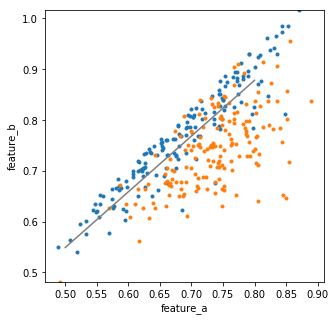

In [185]:
# Logistic Classification with Finite Differences
logistic_y = np.copy(y_train)
logistic_y[y_train == number_a] = 0  #reset the labels to 0 to 1
logistic_y[y_train == number_b] = 1

#def sigmoid_activation(scores):
 #   sig_result=1 / (1 + np.exp(-scores))
 #   sig_result=1 + np.exp(-scores)
  #  return sig_result

def loss_logistic(features, labels, weights):
   
    datasize=np.shape(features)
    instance_num=datasize[0]
    y_pred = np.dot(features,weights)
    loss = y_pred - labels
    cost_log = (1/instance_num)*(np.sum(np.log(1+np.exp(np.dot(-labels,y_pred)))))  
   # gradient = np.dot(features_Trans, loss)/instance_num  #derivative of MSE
    return cost_log
#w_gradient_log = np.random.rand(2) # init weights to some random value.
w_gradient_log = np.ones((2))*-0.5
num_iterations = 200 # set this to the number of iterations
delta = 11.5e-3 # This may need to be adjusted 10e-3
step_size = 10e-3 #10e-3
gradient = np.zeros((2,))

plt.figure(figsize=(5,5))
plt.plot(X_features_a[:, 0], X_features_a[:, 1], '.')
plt.plot(X_features_b[:, 0], X_features_b[:, 1], '.')
plt.xlabel('feature_a')
plt.ylabel('feature_b')
plt.ylim(X_features[:, 1].min(), X_features[:, 1].max())
x1points=np.linspace(0.5,0.8,100)

for i in range(num_iterations):
    cost_log=loss_logistic(X_features,logistic_y,w_gradient_log)
    w1 = np.copy(w_gradient_log)
    w1[0] = w1[0]+delta
    gradient[0] = (loss_logistic(X_features, logistic_y, w1)-loss_logistic(X_features, logistic_y, w_gradient_log))/delta
    
    w2 = np.copy(w_gradient_log)
    w2[1] = w2[1]+delta
    gradient[1] = (loss_logistic(X_features, logistic_y, w2)-loss_logistic(X_features, logistic_y, w_gradient_log))/delta
    w_gradient_log=w_gradient_log-step_size * gradient

    coeff=-w_gradient_log[0]/w_gradient_log[1]
    linex2=coeff*x1points
    plt.plot(x1points,linex2)
    #gradient = gradient/norm(gradient)
    #w_gradient_log=w_gradient_log-step_size * gradient
    print("Iteration %d | Cost: %f" % (i, cost_log))
    
error_gradient_log=accuracy_metrics3(X_features,logistic_y,w_gradient_log,t=0.5)
print("Gradient descent weight: %f %f" % (w_gradient_log[0],w_gradient_log[1]))
print("cost: %f" % (cost_log))
print("Training data accuracy from gradient descent: %f percent" % (error_gradient_log))

logistic_y_test = np.copy(y_test)
logistic_y_test[y_test == number_a] = 0  #reset the labels to 0 to 1
logistic_y_test[y_test == number_b] = 1
error_test_log=accuracy_metrics3(X_features_test,logistic_y_test,w_gradient_log,t=0.5)
print("Test data Accuracy from gradient descent: %f percent" % (error_test_log))
